In [63]:
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



In [64]:
df=pd.read_csv("/Users/navkiratsingh/Documents/coding/HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [65]:
%matplotlib inline
import matplotlib.pyplot as plt 

<BarContainer object of 3 artists>

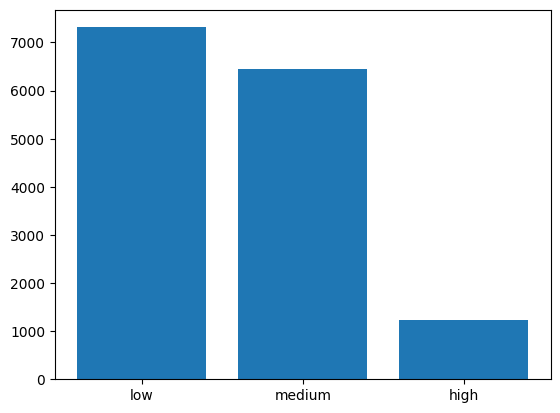

In [66]:

class_count=df['salary'].value_counts()
plt.bar(class_count.index,class_count.values)

<BarContainer object of 2 artists>

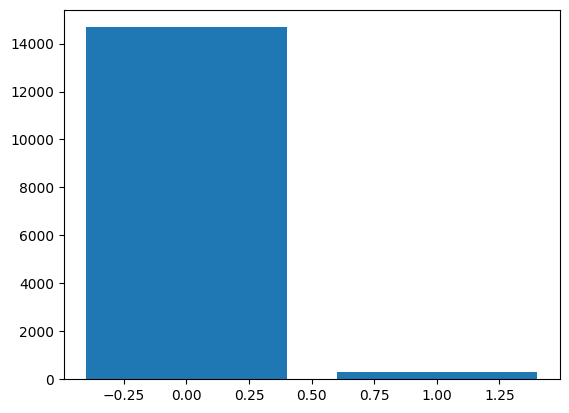

In [67]:
class_count=df['promotion_last_5years'].value_counts()
plt.bar(class_count.index,class_count.values)

<BarContainer object of 10 artists>

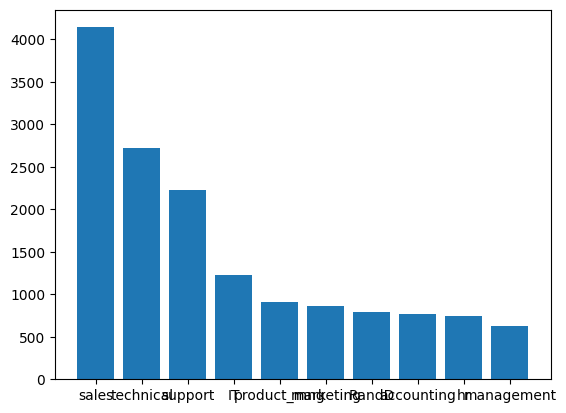

In [68]:
class_count=df['Department'].value_counts()
plt.bar(class_count.index,class_count.values)

<Figure size 5000x7000 with 0 Axes>

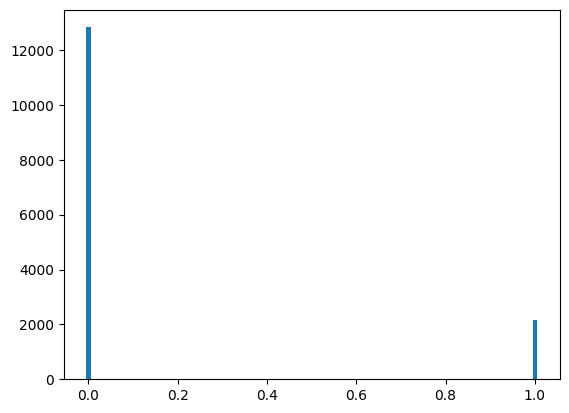

<Figure size 5000x7000 with 0 Axes>

In [69]:
class_count=df['Work_accident'].value_counts()
plt.bar(class_count.index,class_count.values,width=0.01)
plt.figure(figsize=(50,70))

<BarContainer object of 8 artists>

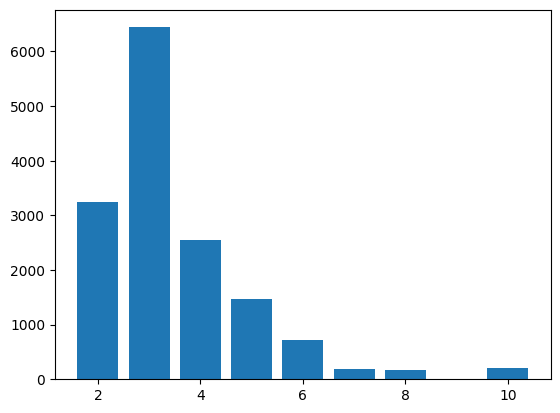

In [70]:
class_count=df['time_spend_company'].value_counts()
plt.bar(class_count.index,class_count.values)

<BarContainer object of 215 artists>

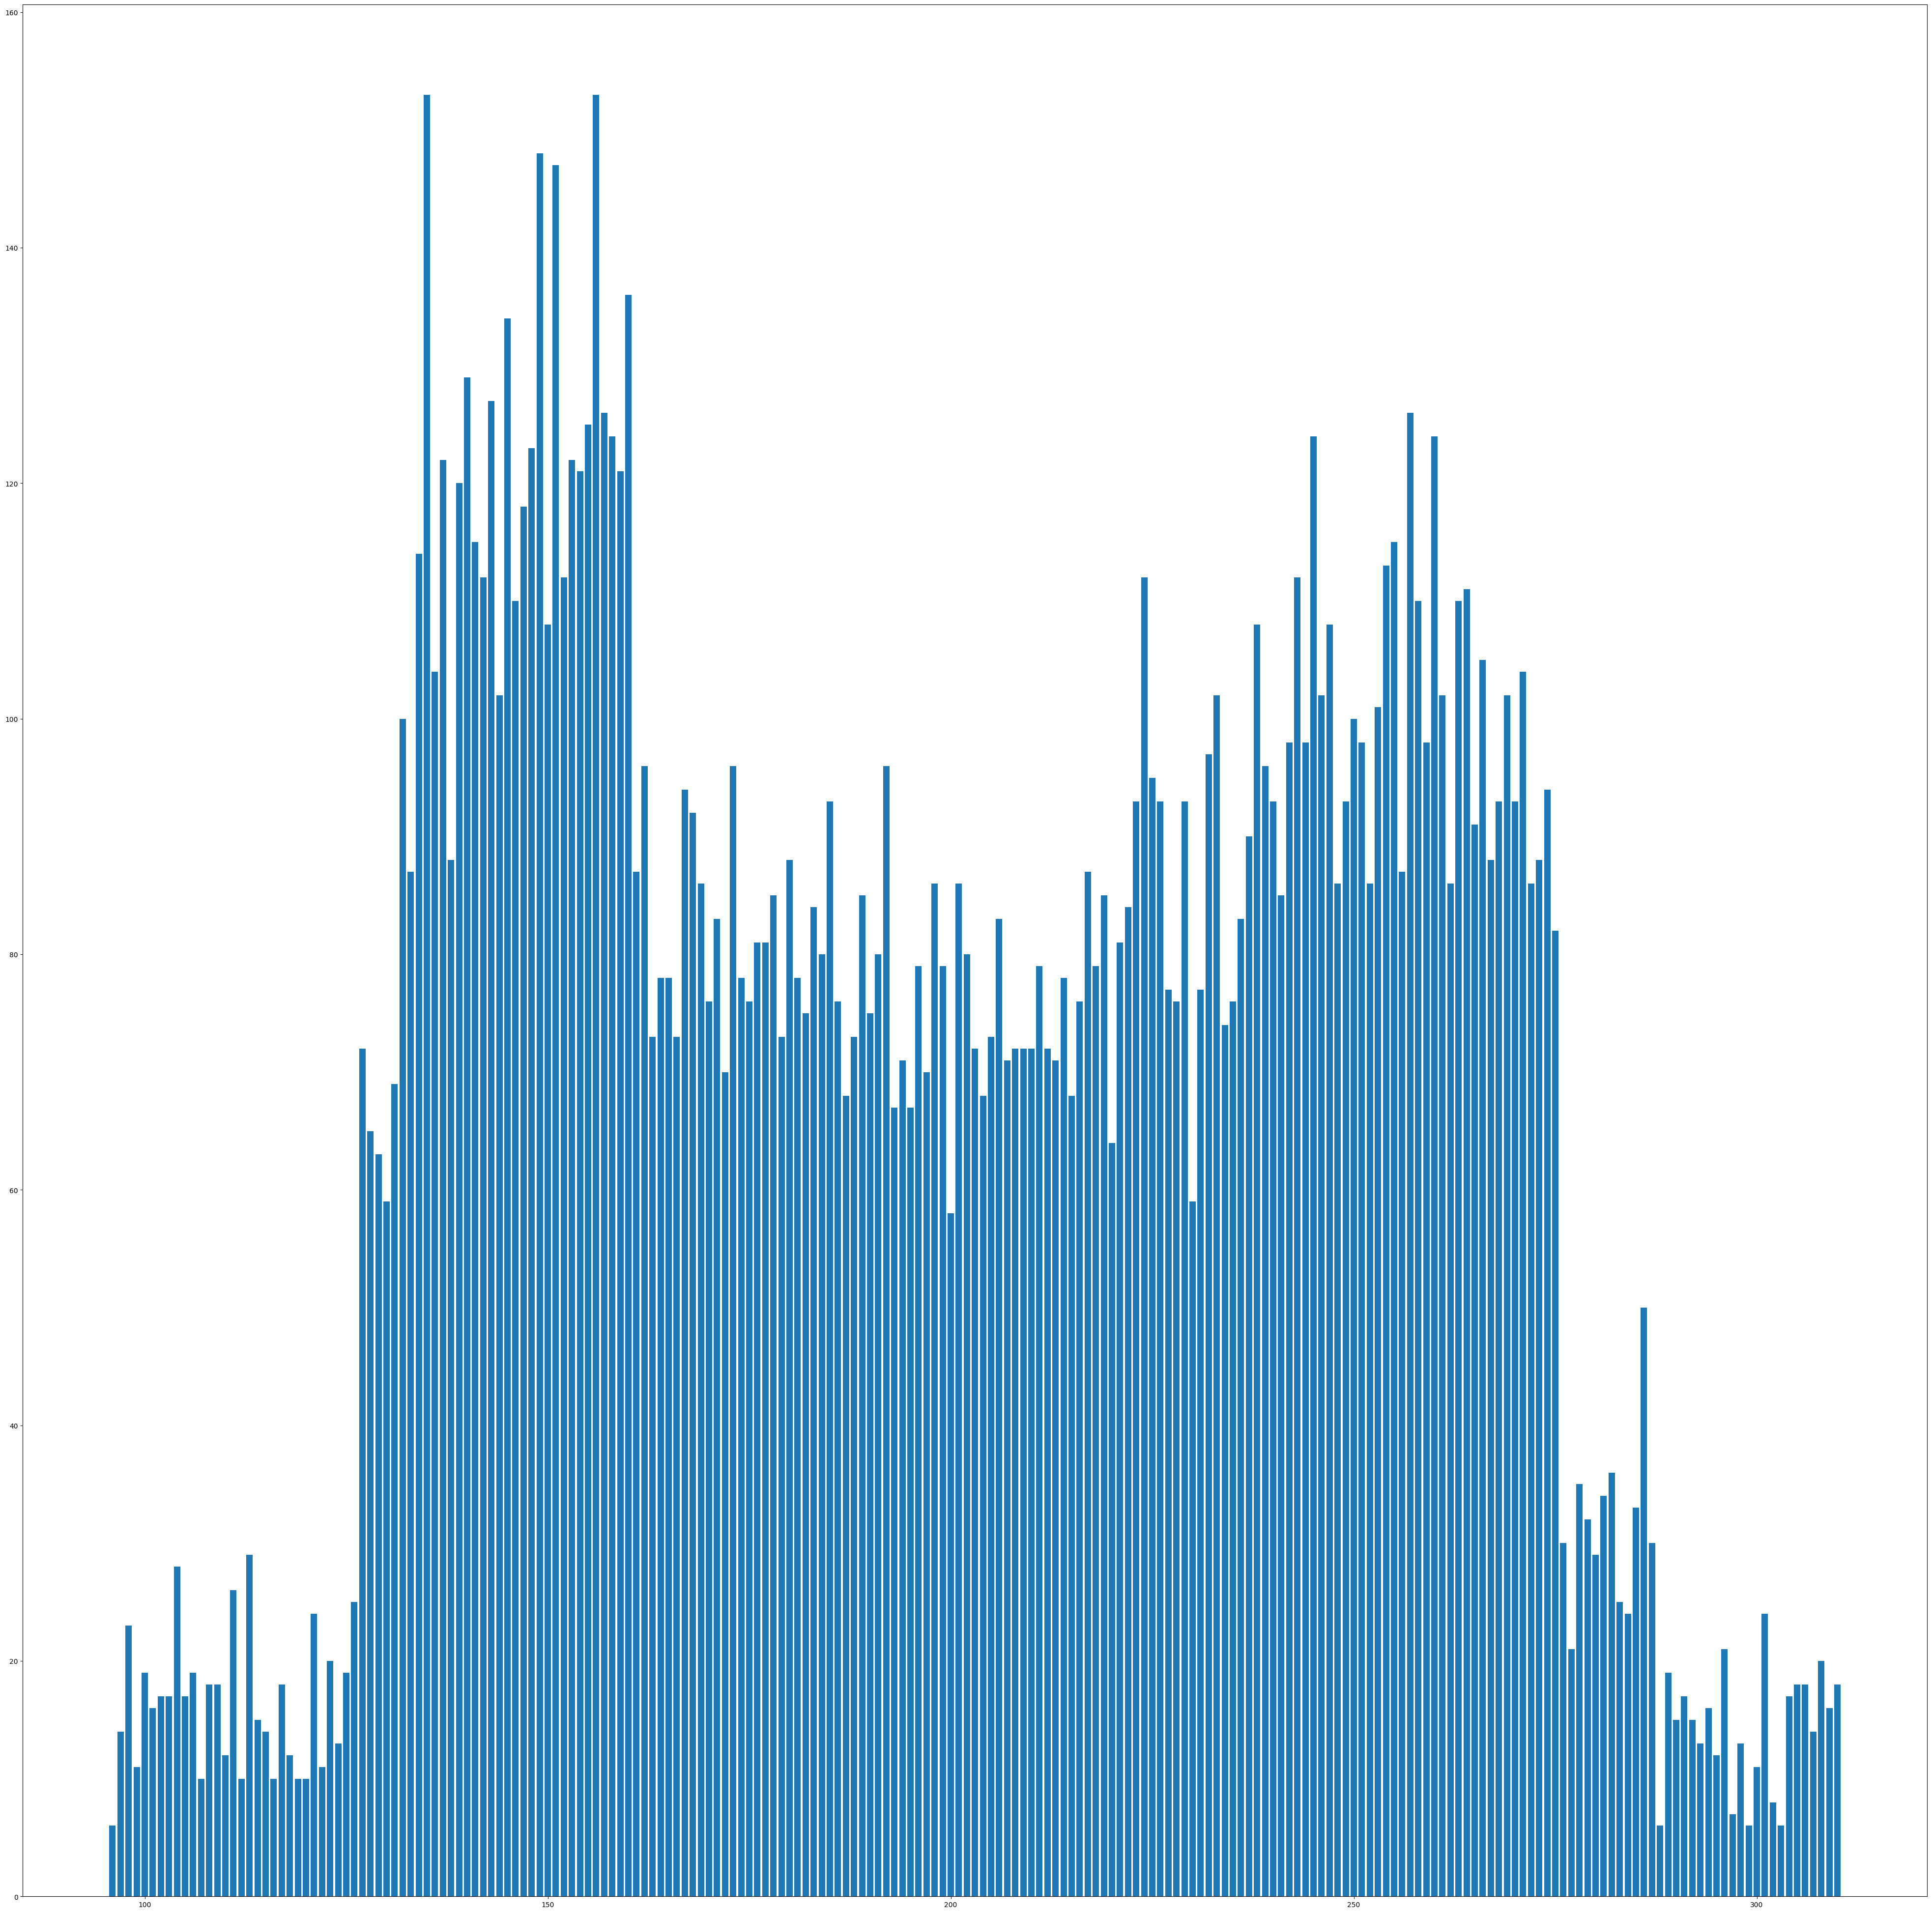

In [71]:
class_count=df['average_montly_hours'].value_counts()
plt.figure(figsize=(50,50))
plt.bar(class_count.index,class_count.values)

<BarContainer object of 92 artists>

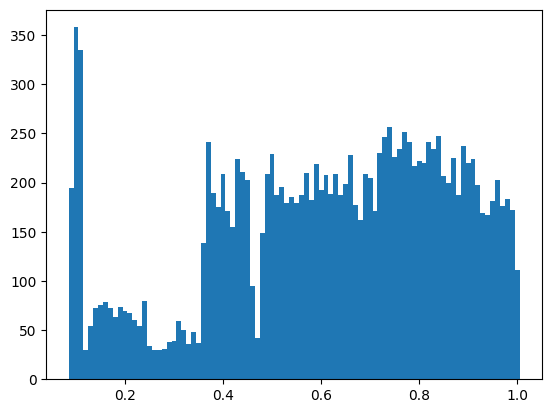

In [72]:
class_count=df['satisfaction_level'].value_counts()
plt.bar(class_count.index,class_count.values,width=0.01)

<BarContainer object of 65 artists>

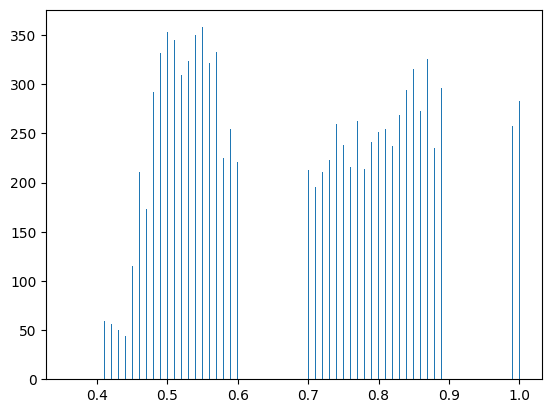

In [73]:
class_count=df['last_evaluation'].value_counts()
plt.bar(class_count.index,class_count.values,width=0.001)

<BarContainer object of 6 artists>

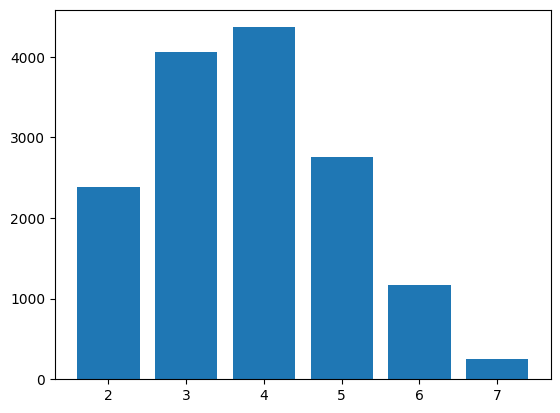

In [74]:
class_count=df['number_project'].value_counts()
plt.bar(class_count.index,class_count.values)

<Axes: xlabel='salary'>

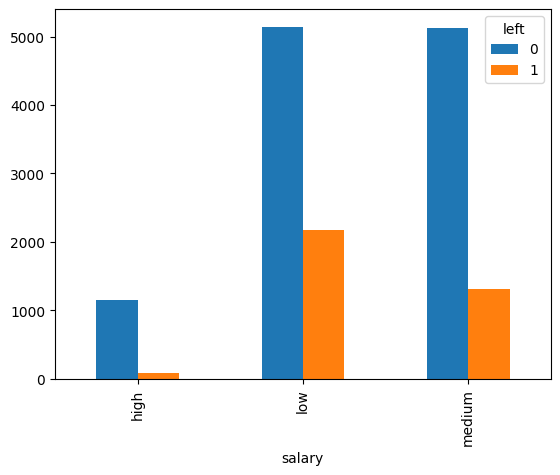

In [75]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

<Axes: xlabel='promotion_last_5years'>

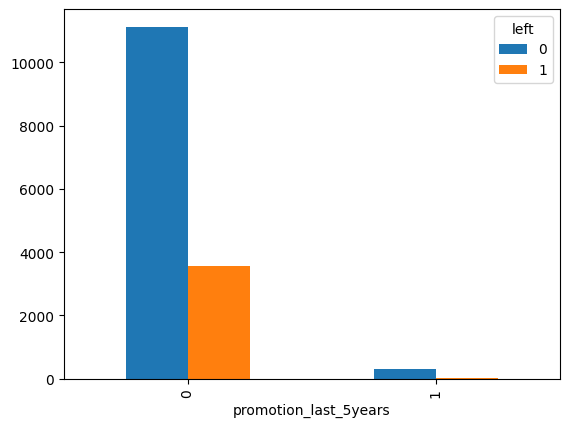

In [76]:
pd.crosstab(df.promotion_last_5years,df.left).plot(kind='bar')

<Axes: xlabel='Department'>

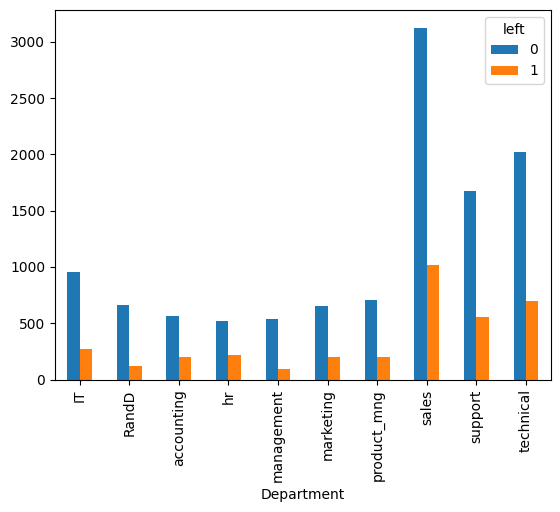

In [77]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [78]:
left=df[df.left==1]
left.shape

(3571, 10)

In [79]:
retained=df[df.left==0]
retained.shape

(11428, 10)

In [80]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [81]:
subdf=df[['satisfaction_level','promotion_last_5years','salary','average_montly_hours']]
subdf.describe()

,satisfaction_level,promotion_last_5years,average_montly_hours
count,14999.000000,14999.000000,14999.000000
mean,0.612834,0.021268,201.050337
std,0.248631,0.144281,49.943099
min,0.090000,0.000000,96.000000
25%,0.440000,0.000000,156.000000
50%,0.640000,0.000000,200.000000
75%,0.820000,0.000000,245.000000
max,1.000000,1.000000,310.000000


In [82]:
subdf['salary']=subdf['salary'].astype(str)

/var/folders/gh/ffn5yjds42j5d22bn5338my40000gn/T/ipykernel_681/444450397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['salary']=subdf['salary'].astype(str)


In [83]:
salary_dummy=pd.get_dummies(subdf.salary, prefix="salary")


In [84]:
df_with_dummy=pd.concat([subdf,salary_dummy],axis='columns')
df_with_dummy.head()

,satisfaction_level,promotion_last_5years,salary,average_montly_hours,salary_high,salary_low,salary_medium
0,0.38,0,low,157,False,True,False
1,0.80,0,medium,262,False,False,True
2,0.11,0,medium,272,False,False,True
3,0.72,0,low,223,False,True,False
4,0.37,0,low,159,False,True,False


In [87]:
df_with_dummy=df_with_dummy.replace(False,"0")
df_with_dummy=df_with_dummy.replace(True,"1")

In [88]:
df_with_dummy.head()

,satisfaction_level,promotion_last_5years,salary,average_montly_hours,salary_high,salary_low,salary_medium
0,0.38,0,low,157,0,1,0
1,0.80,0,medium,262,0,0,1
2,0.11,0,medium,272,0,0,1
3,0.72,0,low,223,0,1,0
4,0.37,0,low,159,0,1,0


In [90]:
finaldf=df_with_dummy.drop(['salary','salary_high'],axis='columns')
finaldf

,satisfaction_level,promotion_last_5years,average_montly_hours,salary_low,salary_medium
0,0.38,0,157,1,0
1,0.80,0,262,0,1
2,0.11,0,272,0,1
3,0.72,0,223,1,0
4,0.37,0,159,1,0
...,...,...,...,...,...
14994,0.40,0,151,1,0
14995,0.37,0,160,1,0
14996,0.37,0,143,1,0
14997,0.11,0,280,1,0


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [93]:
x_train,x_test,y_train,y_test=train_test_split(finaldf[['satisfaction_level','promotion_last_5years','average_montly_hours','salary_low','salary_medium']],df['left'],test_size=0.3)


In [95]:
clf=LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [96]:
y_pred=clf.predict(x_test)

In [98]:
clf.score(x_test,y_test)

0.7786666666666666